In [52]:
import pickle
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_metrics_per_model(metrics_dir="../reports/metrics", save_dir="../reports/figures"):
    sns.set_style("whitegrid")

    os.makedirs(save_dir, exist_ok=True)
    files = [f for f in os.listdir(metrics_dir) if f.endswith(".pkl") and f.startswith("metrics_")]

    for fname in files:
        model_name = fname.replace("metrics_", "").replace(".pkl", "")
        filepath = os.path.join(metrics_dir, fname)

        # Cargar métricas
        with open(filepath, "rb") as f:
            history = pickle.load(f)

        epochs = range(1, len(history["train_loss"]) + 1)

        # DataFrames
        df_loss = pd.DataFrame({
            "Epoch": epochs,
            "Train Loss": history["train_loss"],
            "Val Loss": history["val_loss"]
        })
        df_acc = pd.DataFrame({
            "Epoch": epochs,
            "Train Acc": history["train_acc"],
            "Val Acc": history["val_acc"]
        })

        # Crear figura con 2 subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Loss subplot
        sns.lineplot(ax=axes[0], x="Epoch", y="Train Loss", data=df_loss,
                     label="Train Loss", linewidth=2.2)
        sns.lineplot(ax=axes[0], x="Epoch", y="Val Loss", data=df_loss,
                     label="Val Loss", linewidth=2.2, linestyle="--")
        axes[0].set_title(f"Loss - {model_name}", fontsize=13, fontweight="bold")
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")
        axes[0].legend()

        # Accuracy subplot
        sns.lineplot(ax=axes[1], x="Epoch", y="Train Acc", data=df_acc,
                     label="Train Accuracy", linewidth=2.2)
        sns.lineplot(ax=axes[1], x="Epoch", y="Val Acc", data=df_acc,
                     label="Val Accuracy", linewidth=2.2, linestyle="--")
        axes[1].set_title(f"Accuracy - {model_name}", fontsize=13, fontweight="bold")
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Accuracy")
        axes[1].legend()

        plt.suptitle(f"Performance Metrics - {model_name}", fontsize=15, fontweight="bold")
        plt.tight_layout()

        save_path = os.path.join(save_dir, f"metrics_{model_name}.svg")
        plt.savefig(save_path, format="svg")
        plt.close(fig)

        print(f"Figure Saved in {save_path}")

In [28]:
plot_metrics_per_model("../reports/metrics")

Figure Saved in ../reports/figures\metrics_LeNetModern.svg
Figure Saved in ../reports/figures\metrics_MLPClassifier.svg


C:\Users\joaqu\AppData\Local\Temp\ipykernel_9212\774674253.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="true_label", y="correct", data=acc_per_class, palette=bar_colors)


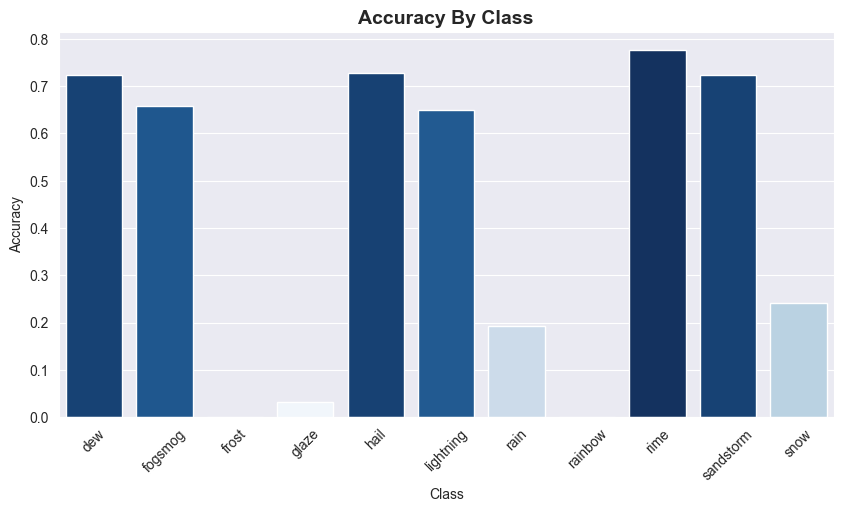

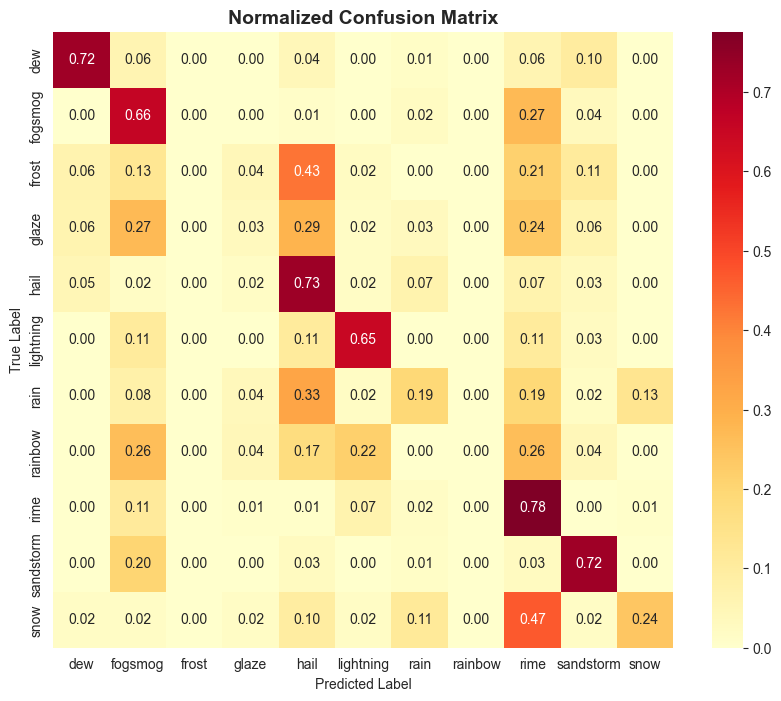

In [53]:
sns.set_style("darkgrid")

df = pd.read_csv("../models/predictions/preds_MLPClassifier.csv")

class_names = [
    "dew","fogsmog","frost","glaze","hail",
    "lightning","rain","rainbow","rime","sandstorm","snow"
]

df["true_label"] = df["true_label"].map(lambda x: class_names[x])
df["pred_label"] = df["pred_label"].map(lambda x: class_names[x])

acc_per_class = df.groupby("true_label")["correct"].mean().reset_index()

norm = plt.Normalize(acc_per_class["correct"].min(), acc_per_class["correct"].max())
cmap = plt.cm.Blues
bar_colors = [cmap(norm(val)) for val in acc_per_class["correct"]]

plt.figure(figsize=(10,5))
sns.barplot(x="true_label", y="correct", data=acc_per_class, palette=bar_colors)
plt.title("Accuracy By Class", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

cm = confusion_matrix(df["true_label"], df["pred_label"], labels=class_names)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f",
            cmap="YlOrRd",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Normalized Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\Users\joaqu\AppData\Local\Temp\ipykernel_9212\2423226721.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="true_label", y="correct", data=acc_per_class, palette=bar_colors)


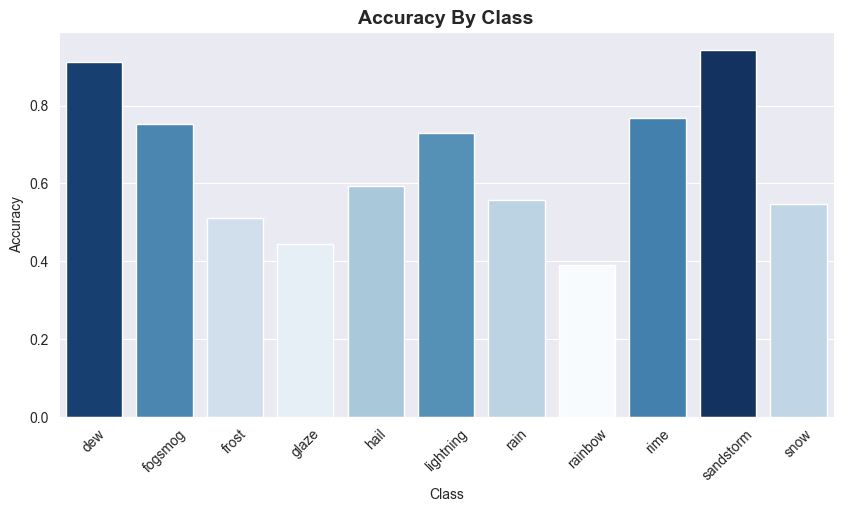

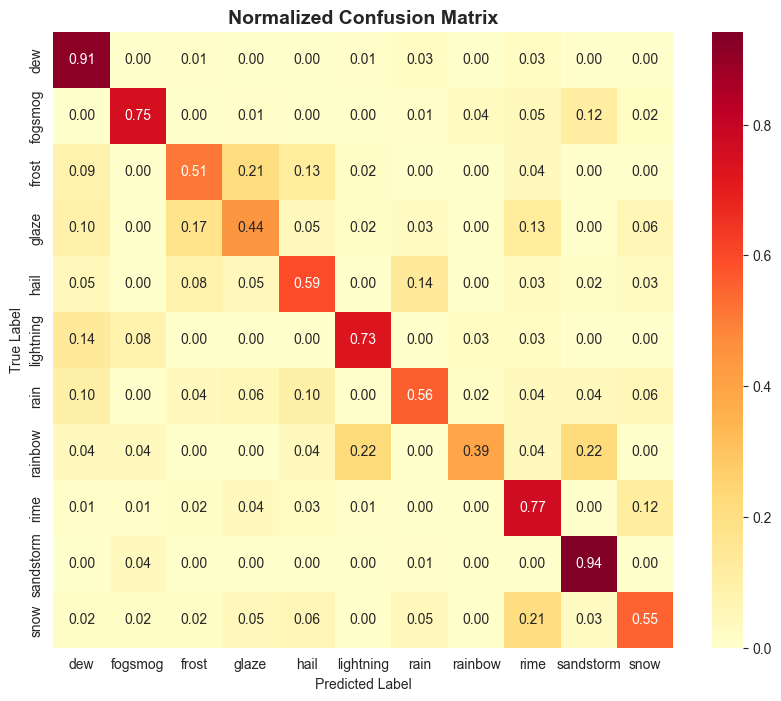

In [51]:
sns.set_style("darkgrid")


df = pd.read_csv("../models/predictions/preds_LeNetModern.csv")

class_names = [
    "dew","fogsmog","frost","glaze","hail",
    "lightning","rain","rainbow","rime","sandstorm","snow"
]

df["true_label"] = df["true_label"].map(lambda x: class_names[x])
df["pred_label"] = df["pred_label"].map(lambda x: class_names[x])

acc_per_class = df.groupby("true_label")["correct"].mean().reset_index()

norm = plt.Normalize(acc_per_class["correct"].min(), acc_per_class["correct"].max())
cmap = plt.cm.Blues
bar_colors = [cmap(norm(val)) for val in acc_per_class["correct"]]

plt.figure(figsize=(10,5))
sns.barplot(x="true_label", y="correct", data=acc_per_class, palette=bar_colors)
plt.title("Accuracy By Class", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

cm = confusion_matrix(df["true_label"], df["pred_label"], labels=class_names)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f",
            cmap="YlOrRd",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Normalized Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
